In [1]:
# usual first cell - Zack Li
%matplotlib inline 
# fix DPI issues on mac
%config InlineBackend.figure_format = 'retina' 
#nice math fonts
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = '\usepackage{amsmath}' 

In [2]:
from classy import Class
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
max_l = 5000
TCMB = 2.726
lensing = 'no'

params_adiabatic = {
    'output': 'tCl lCl pCl',
    'modes': 's', 
    'lensing': lensing,
    'ic': 'ad',
    'l_max_scalars':max_l}

params_CDI = {
    'output': 'tCl lCl pCl',
    'modes': 's',
    'lensing': lensing,
    'ic': 'cdi',
    'f_cdi': '1',
    'n_cdi': '1',
    'l_max_scalars':max_l
    }

# Define your cosmology (what is not specified will be set to CLASS default parameters)
params_NID = {
    'output': 'tCl lCl pCl',
    'modes': 's', # scalar perturbations
    'lensing': lensing,
    'ic': 'nid',
    'f_nid': '1',
    'n_nid': '1',
    'l_max_scalars':max_l
    }

# Define your cosmology (what is not specified will be set to CLASS default parameters)
params_NIV = {
    'output': 'tCl lCl pCl',
    'modes': 's', # scalar perturbations
    'lensing': lensing,
    'ic': 'niv',
    'f_niv': '1',
    'n_niv': '1',
    'l_max_scalars':max_l
    }

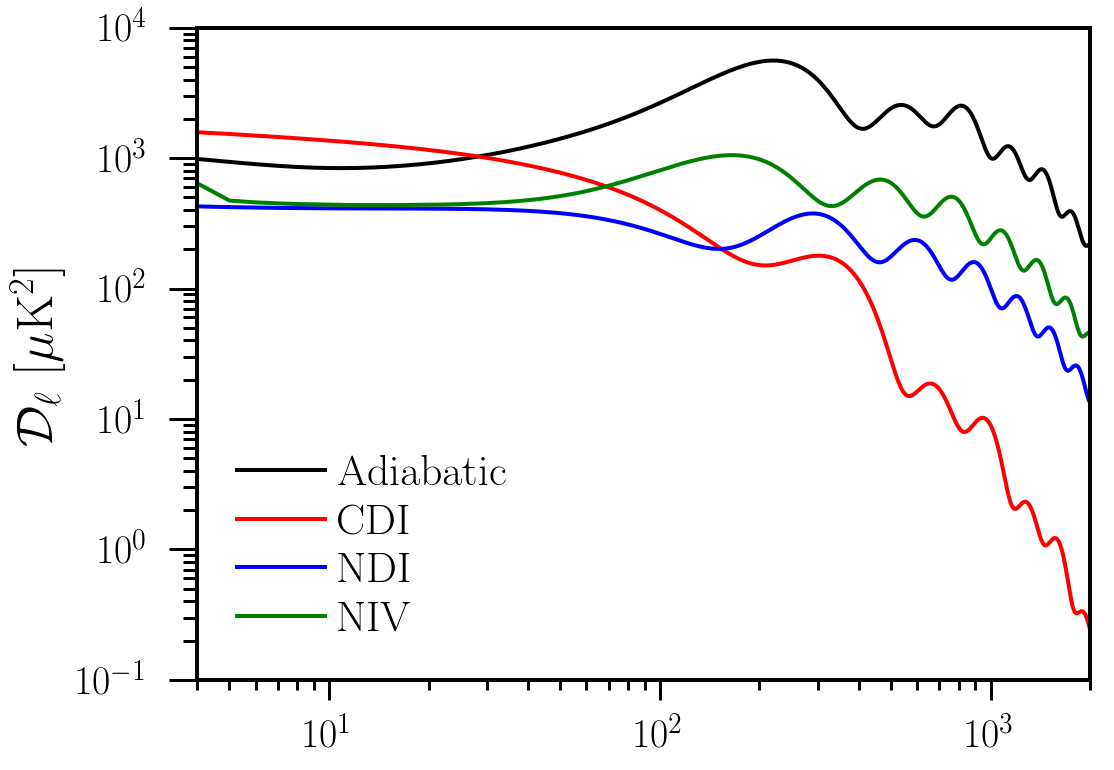

In [4]:
def get_stuff(new_params):
    cosmo = Class()
    cosmo.set(new_params)
    cosmo.compute()
    cls = cosmo.raw_cl(max_l)  
    xx = np.array( range(max_l+1)[2:] )
    yy = np.array( cls['ee'][2:] )
    zz = np.array( cls['tt'][2:] )
    tt =  ((xx)*(xx+1) * zz / (2 * math.pi))  * (TCMB*1.0e6)**2
    cosmo.struct_cleanup()
    return xx, yy, zz, tt

plt.figure(figsize=(8,6))
xx, yy, zz, tt = get_stuff(params_adiabatic)
plt.plot( xx, tt, label='Adiabatic', c="black" )
xx, yy, zz, tt = get_stuff(params_CDI)
plt.plot( xx, tt, label='CDI', c="red" )
xx, yy, zz, tt = get_stuff(params_NID)
plt.plot( xx, tt, label='NDI', c="blue" )
xx, yy, zz, tt = get_stuff(params_NIV)
plt.plot( xx, tt, label='NIV', c="green" )

plt.xlim(4,2000)
plt.ylim(1e-1,1e4)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$K$^2$]');

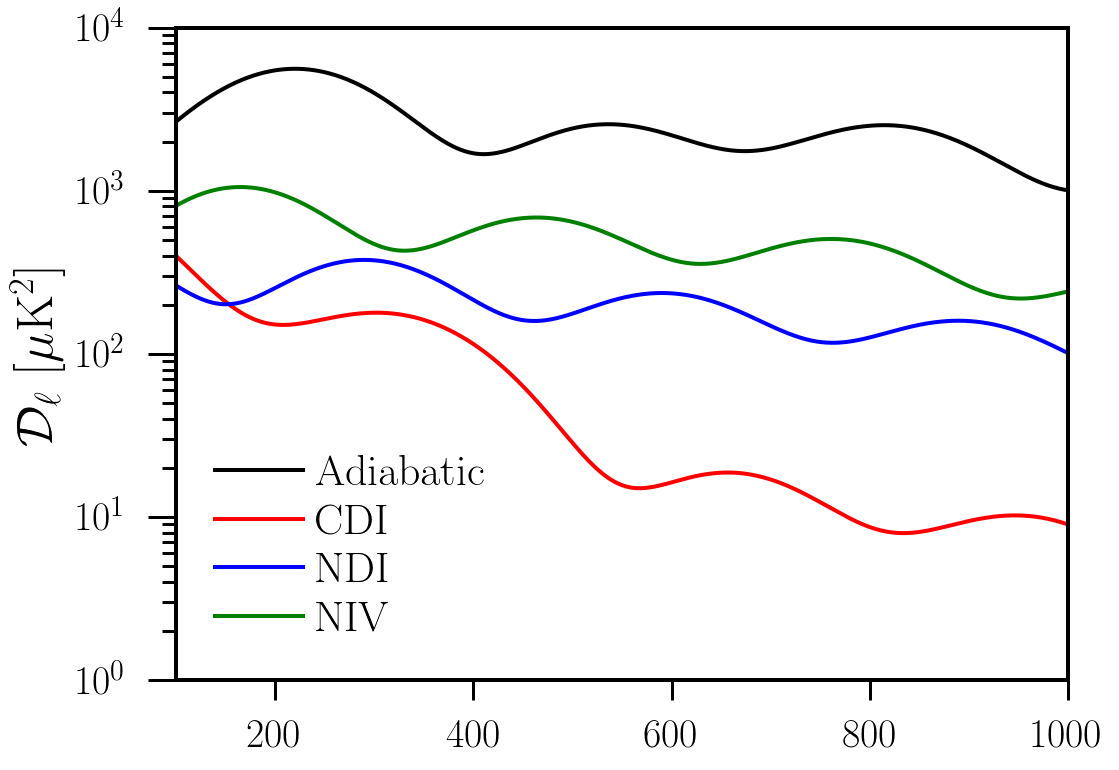

In [5]:
plt.figure(figsize=(8,6))
xx, yy, zz, tt = get_stuff(params_adiabatic)
plt.plot( xx, tt, label='Adiabatic', c="black" )
xx, yy, zz, tt = get_stuff(params_CDI)
plt.plot( xx, tt, label='CDI', c="red" )
xx, yy, zz, tt = get_stuff(params_NID)
plt.plot( xx, tt, label='NDI', c="blue" )
xx, yy, zz, tt = get_stuff(params_NIV)
plt.plot( xx, tt, label='NIV', c="green" )

plt.xlim(100,1000)
plt.ylim(1e0,1e4)
plt.yscale('log')
plt.legend()
plt.ylabel(r'$\mathcal{D}_{\ell}$ [$\mu$K$^2$]');